# Calculate Confidence Intervals and Hypothsis Testing Using Stock Data 

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, sem, t



#### Read in Data

In [199]:
df_google = pd.read_csv("Google.csv")
df_netflix = pd.read_csv("Netflix.csv")

### Google Analysis

#### Initial Plots

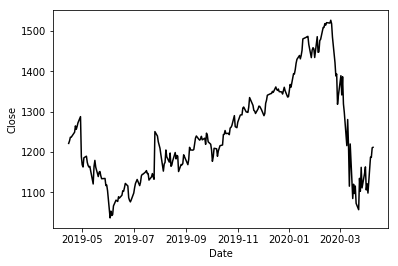

In [200]:
# To Find Daily Return
""" I Used today's closing price minus yesterday's closing price to account for after-hour trading"""
df_google['Close'] = df_google['Close'].replace('[\$,]', '', regex = True ).astype(float)
df_google['Yesterday_Close'] = df_google['Close'].shift(-1)
df_google['Daily_Return'] = df_google['Yesterday_Close'] - df_google['Close']
df_google['Date'] = df_google['Date'].astype('datetime64[ns]')

# Plot of Stock Price of Google over Time
sns.lineplot(x=df_google['Date'], y=df_google['Close'], color = 'black')
x_dates = df_google['Date'].dt.strftime('%b-%Y')

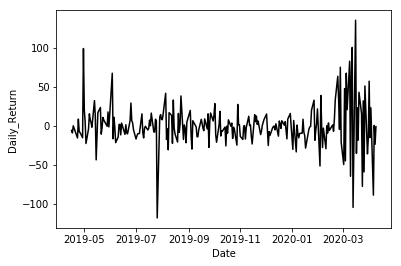

In [201]:
# Plot Daily Returns over Time
sns.lineplot(x=df_google['Date'], y=df_google['Daily_Return'], color = 'black')
x_dates = df_google['Date'].dt.strftime('%b-%Y')

#### Distribution of Daily Returns 

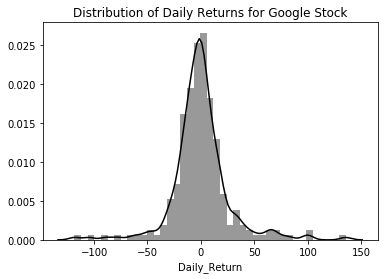

In [202]:
x = df_google['Daily_Return'].dropna()
plt.title('Distribution of Daily Returns for Google Stock')
sns.distplot(x, color="black")
plt.show()

#### Calculate 95% Confidence Interval and Statistical Summary

In [203]:
# Split Data
df_google_now = df_google.head(125).dropna()
df_google_then = df_google.tail(125).dropna()

# Calculate the 95% CI for first set average daily log return
size = df_google_then.shape[0]
dr_average = df_google_then['Daily_Return'].mean()
price_average = df_google_then['Close'].mean()
se = sem(df_google_then['Daily_Return'])
sd = np.std(df_google_then['Daily_Return'])
google_ci = [dr_average - t.ppf(.975,  df=size-1) * sd/np.sqrt(size),
           dr_average + t.ppf(.975,  df=size-1) * sd/np.sqrt(size)]
print(f'Google Set I Daily Return Average: {dr_average}')
print(f'Google Set I Close Average: {price_average}')
print(f'Google Set I Daily Return Standard Error: {se}')
print(f'Google Set I Daily Return Standard Deviation: {sd}')
print(f'Google Set I Daily Return Confidence Interval: {google_ci}')

Google Set I Daily Return Average: 0.10024193548386964
Google Set I Close Average: 1167.2911290322584
Google Set I Daily Return Standard Error: 1.8900176520867336
Google Set I Daily Return Standard Deviation: 20.961309768226123
Google Set I Daily Return Confidence Interval: [-3.625816203928105, 3.826300074895844]


In [204]:
# Compare against second set of data

size_t = df_google_now.shape[0]
dr_average_t = df_google_now['Daily_Return'].mean()
price_average_t = df_google_now['Close'].mean()
se_t = sem(df_google_now['Daily_Return'])
sd_t = np.std(df_google_now['Daily_Return'])
google_ci_t= [dr_average_t - t.ppf(.975,  df=size_t-1) * sd/np.sqrt(size_t),
           dr_average_t + t.ppf(.975,  df=size_t-1) * sd/np.sqrt(size_t)]
print(f'Google Set II Daily Return Average: {dr_average_t}')
print(f'Google Set II Close Average: {price_average_t}')
print(f'Google Set II Daily Return Standard Error: {se_t}')
print(f'Google Set II Daily Return Standard Deviation: {sd_t}')
print(f'Google Set II Daily Return Confidence Interval: {google_ci_t}')
df_google_sd = df_google_now.where((df_google_now.Daily_Return > google_ci[0]) & (df_google_now.Daily_Return < google_ci[1])).dropna()
print(f'Number of Samples Inside 95% Confidence Interval: {df_google_sd.shape[0]}')
print(ttest_1samp(df_google_now.Daily_Return, popmean = dr_average ))

Google Set II Daily Return Average: -0.02223999999999978
Google Set II Close Average: 1322.0945599999995
Google Set II Daily Return Standard Error: 2.8901572808279106
Google Set II Daily Return Standard Deviation: 32.18342942233472
Google Set II Daily Return Confidence Interval: [-3.73306668856129, 3.688586688561291]
Number of Samples Inside 95% Confidence Interval: 33
Ttest_1sampResult(statistic=-0.04237898618748645, pvalue=0.9662647439258596)


With 33/125 samples within the 95% confidence interval when comparing the first half of the year set of data to the second half, this tells us that our daily return average of -0.0200 is not very accurate to depict the wide range of daily returns experienced by Google stocks.  This is due to the volitility of the market, especially in the second half of the year. 

When comparing the two data sets, the smaller standard deviation from the first half of the year tells us that Google stocks were much more stable in the first half of the year vs the second half (thank you COVID-19), but the similar average daily returns tells us that though volitile, the daily return averages out to be more or less the same, with mimial loss during the COVID-19 crisis.  Our confidence intervals, though tell a different story.  This can be seen when we compare the average close price, the first set of Google stock prices is over $100 greater than the later set of Google stock prices.

The P value of 0.95 and T statistic of 0.065 tell us that despite the volitility and low confidence in the average daily return, the first half of the data was a good indicator of Google Stock performance. 

## Netflix Analysis

#### Inital Plots

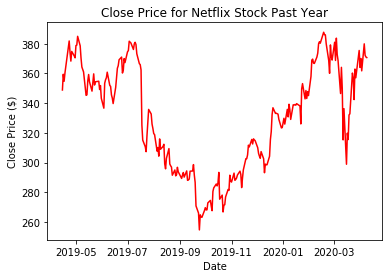

In [205]:
# To Find Daily Return
""" I Used today's closing price minus yesterday's closing price to account for after-hour trading"""
df_netflix['Close'] = df_netflix['Close'].replace('[\$,]', '', regex = True ).astype(float)
df_netflix['Yesterday_Close'] = df_netflix['Close'].shift(-1)
df_netflix['Daily_Return'] = df_netflix['Yesterday_Close'] - df_netflix['Close']
df_netflix['Date'] = df_netflix['Date'].astype('datetime64[ns]')

# Plot of Stock Price of Google over Time
plt.title('Close Price for Netflix Stock Past Year')
fig = sns.lineplot(x=df_netflix['Date'], y=df_netflix['Close'],color = 'r')
fig.set(xlabel='Date', ylabel='Close Price ($)')
x_dates = df_netflix['Date'].dt.strftime('%b-%Y')
plt.show()

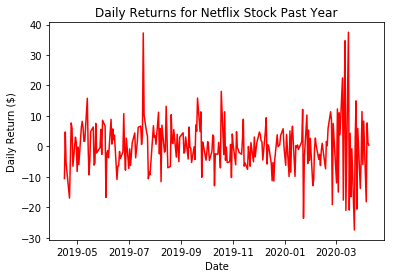

In [206]:
# Plot Daily Returns over Time
plt.title('Daily Returns for Netflix Stock Past Year')

fig = sns.lineplot(x=df_netflix['Date'], y=df_netflix['Daily_Return'], color = 'r')
fig.set(xlabel='Date', ylabel='Daily Return ($)')
x_dates = df_netflix['Date'].dt.strftime('%b-%Y')
plt.show()

In [207]:
# Split Data
df_netflix_now = df_netflix.head(125).dropna()
df_netflix_then = df_netflix.tail(125).dropna()

# Calculate the 95% CI for first set average daily log return
size = df_netflix_then.shape[0]
dr_average = df_netflix_then['Daily_Return'].mean()
price_average = df_netflix_then['Close'].mean()
se = sem(df_netflix_then['Daily_Return'])
sd = np.std(df_netflix_then['Daily_Return'])
ci = [dr_average - t.ppf(.975,  df=size-1) * sd/np.sqrt(size),
           dr_average + t.ppf(.975,  df=size-1) * sd/np.sqrt(size)]
print(f'Netflix Set I Daily Return Average: {dr_average}')
print(f'Netflix Set I Close Average: {price_average}')
print(f'Netflix Set I Daily Return Standard Error: {se}')
print(f'Netflix Set I Daily Return Standard Deviation: {sd}')
print(f'Netflix Set I Daily Return Confidence Interval: {ci}')

Netflix Set I Daily Return Average: 0.551532258064516
Netflix Set I Close Average: 330.08201612903207
Netflix Set I Daily Return Standard Error: 0.6420179679181505
Netflix Set I Daily Return Standard Deviation: 7.120323710967037
Netflix Set I Daily Return Confidence Interval: [-0.7141682354567912, 1.817232751585823]


In [208]:
# Compare against second set of data

size_t = df_netflix_now.shape[0]
dr_average_t = df_netflix_now['Daily_Return'].mean()
price_average_t = df_netflix_now['Close'].mean()
se_t = sem(df_netflix_now['Daily_Return'])
sd_t = np.std(df_netflix_now['Daily_Return'])
ci_t= [dr_average - t.ppf(.975,  df=size-1) * sd/np.sqrt(size),
           dr_average + t.ppf(.975,  df=size-1) * sd/np.sqrt(size)]
print(f'Netflix Set II Daily Return Average: {dr_average_t}')
print(f'Netflix Set II Close Average: {price_average_t}')
print(f'Netflix Set II Daily Return Standard Error: {se_t}')
print(f'Netflix Set II Daily Return Standard Deviation: {sd_t}')
print(f'Netflix Set II Daily Return Confidence Interval: {ci_t}')
netflix_sd = df_netflix_now.where((df_netflix_now.Daily_Return > ci[0]) & (df_netflix_tail.Daily_Return < ci[1])).dropna()
print(f'Number of Samples Inside 95% Confidence Interval: {netflix_sd.shape[0]}')

Netflix Set II Daily Return Average: -0.7219200000000001
Netflix Set II Close Average: 330.61824
Netflix Set II Daily Return Standard Error: 0.8725662536708385
Netflix Set II Daily Return Standard Deviation: 9.71648658279319
Netflix Set II Daily Return Confidence Interval: [-0.7141682354567912, 1.817232751585823]
Number of Samples Inside 95% Confidence Interval: 0


Ttest_1sampResult(statistic=-1.4594333126076928, pvalue=0.14697458457683402)


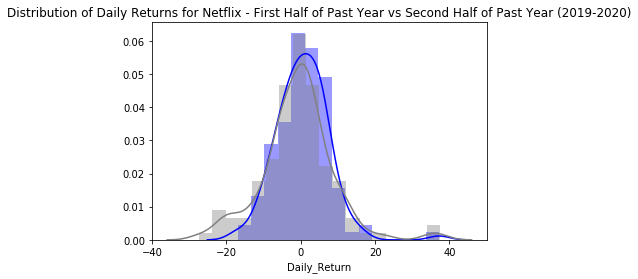

In [209]:
print(ttest_1samp(df_netflix_now.Daily_Return, popmean = dr_average ))
sns.distplot(df_netflix_then['Daily_Return'],color="blue")
sns.distplot(df_netflix_now['Daily_Return'],color="grey")
plt.title('Distribution of Daily Returns for Netflix - First Half of Past Year vs Second Half of Past Year (2019-2020)')

plt.show()

With 27/125 samples within the 95% confidence interval when comparing the first half of the year set of data to the second half, this tells us that our daily return average of 0.72 is even less accurate than the Google's prediction to wide range of daily returns experienced by Google stocks.  This can be observed in the enormous standard deviation of $7.12

The positive average daily return in the first half vs the negative daiy average return over the last half tells us that netflix had a much better growth in the first part of the year, despite the boost from COVID-19 #netflixandchill. However, the average stock price increased very slightly.  

The low P Value and high T-statistic tells us the first half of the year was a poor indicator of Netflix stock performance in the second half of the year. 